In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as const
import astropy.units as u
plt.rcParams['font.size'] = 25


In [56]:
dataframe = pd.read_csv('run5.csv')
dataframe

,Temperature (K),B-Field (Gauss),sample I AB,sample I AD,sample I AC,sample I BD,sample I -AB,sample I -AD,sample I -AC,sample I -BD,Voltage DC,Voltage BC,Voltage BD,Voltage AC,Voltage -DC,Voltage -BC,Voltage -BD,Voltage -AC
0,96.020,-4611.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.018572,0.023846,0.076496,0.069674,-0.018687,-0.024693,-0.077875,-0.070401
1,97.290,-30.490000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.012820,0.014765,0.002175,-0.002037,-0.012945,-0.015494,-0.003359,0.001294
2,98.660,4596.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.020006,0.021451,-0.070205,-0.077554,-0.020112,-0.022190,0.069023,0.076799
3,100.215,-4611.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.019960,0.025548,0.077145,0.069712,-0.020069,-0.026403,-0.078485,-0.070425
4,101.550,-30.240000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.013915,0.016104,0.002414,-0.002261,-0.014061,-0.016846,-0.003587,0.001529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,344.600,-29.860001,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.000990,0.001164,-0.000063,-0.000380,-0.001543,-0.001741,-0.000432,0.000003
164,346.150,4582.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.000954,0.001133,0.000285,-0.000022,-0.001514,-0.001710,-0.000758,-0.000326
165,347.950,-4594.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.000884,0.001021,-0.000404,-0.000673,-0.001425,-0.001614,-0.000115,0.000300
166,349.450,-29.990000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.000782,0.000915,-0.000093,-0.000340,-0.001333,-0.001505,-0.000404,-0.000022


# Resistivity and Hall Coefficient of the Sample at Room Temperature

In [57]:
def cosh_function(x):
    return 1/np.cosh(np.log(x.value)/2.403)

In [58]:
room_temperature = 300 #K
print(np.where(np.isclose(dataframe['Temperature (K)'], 296.5, rtol = 1e-1) == True)) #Indices to check for room temperature similarities

(array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151]),)


In [59]:
 dataframe.iloc[137] # Select a row number

Temperature (K)     303.200000
B-Field (Gauss)    4583.000000
sample I AB           0.000075
sample I AD           0.000075
sample I AC           0.000075
sample I BD           0.000075
sample I -AB         -0.000075
sample I -AD         -0.000075
sample I -AC         -0.000075
sample I -BD         -0.000075
Voltage DC            0.007730
Voltage BC            0.009005
Voltage BD            0.003349
Voltage AC            0.000725
Voltage -DC          -0.008088
Voltage -BC          -0.009410
Voltage -BD          -0.003744
Voltage -AC          -0.001180
Name: 137, dtype: float64

In [60]:
index = dataframe.iloc[137]
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = index['B-Field (Gauss)'] * u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = index['Voltage BD']/index['sample I AC'] * u.Ohm 
racbd_error = np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) * u.Ohm

rbdac = index['Voltage AC']/index['sample I BD'] * u.Ohm
rbdac_error = np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2) * u.Ohm


rabdc = index['Voltage DC']/index['sample I AB'] * u.Ohm
rabdc_error = np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2) * u.Ohm

radbc = index['Voltage BC']/index['sample I AD'] * u.Ohm
radbc_error = np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) * u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh = -(trans_resistance/magnetic_field * d).to('m^3/C')
rh_error = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')

In [61]:
print("Hall coefficient at room temperature is:", np.round(rh,6), "with an error of", np.round(rh_error,6))
print("Resistivity at room temperature is:", np.round(resistivity,6), "with an error of", np.round(resistivity_error,6))

Hall coefficient at room temperature is: -0.074069 m3 / C with an error of 0.000982 m3 / C
Resistivity at room temperature is: 0.63081 m Ohm with an error of 0.001967 m Ohm


# Plot of Resistivity vs Inverse Temperature


In [62]:
dataframe_pos = dataframe[dataframe['B-Field (Gauss)']>40]
dataframe_neg = dataframe[dataframe['B-Field (Gauss)']<-40]
dataframe_zero = dataframe[dataframe['B-Field (Gauss)']>-40]
dataframe_zero = dataframe_zero[dataframe_zero['B-Field (Gauss)']<40]

In [63]:
rabdc_pos = dataframe_pos['Voltage DC']/dataframe_pos['sample I AB'] # Ohm
rabdc_error_pos = np.sqrt((voltage_error.value/dataframe_pos['sample I AB'])**2 + (current_error.value/dataframe_pos['Voltage DC'])**2) #Ohm
radbc_pos = dataframe_pos['Voltage BC']/dataframe_pos['sample I AD'] #Ohm
radbc_error_pos = np.sqrt((voltage_error.value/dataframe_pos['sample I AD'])**2 + (current_error.value/dataframe_pos['Voltage BC'])**2) #Ohm
resistance_error_pos = np.sqrt(1/4*rabdc_error_pos**2 + 1/4*radbc_error_pos) #Ohm

In [65]:
rabdc_neg = dataframe_neg['Voltage DC']/dataframe_neg['sample I AB'] # Ohm
rabdc_error_neg = np.sqrt((voltage_error.value/dataframe_neg['sample I AB'])**2 + (current_error.value/dataframe_neg['Voltage DC'])**2) #Ohm
radbc_neg = dataframe_neg['Voltage BC']/dataframe_neg['sample I AD'] #Ohm
radbc_error_neg = np.sqrt((voltage_error.value/dataframe_neg['sample I AD'])**2 + (current_error.value/dataframe_neg['Voltage BC'])**2) #Ohm
resistance_error_neg = np.sqrt(1/4*rabdc_error_neg**2 + 1/4*radbc_error_neg) #Ohm

In [66]:
rabdc_zero = dataframe_zero['Voltage DC']/dataframe_zero['sample I AB'] # Ohm
rabdc_error_zero = np.sqrt((voltage_error.value/dataframe_zero['sample I AB'])**2 + (current_error.value/dataframe_zero['Voltage DC'])**2) #Ohm
radbc_zero = dataframe_zero['Voltage BC']/dataframe_zero['sample I AD'] #Ohm
radbc_error_zero = np.sqrt((voltage_error.value/dataframe_zero['sample I AD'])**2 + (current_error.value/dataframe_zero['Voltage BC'])**2) #Ohm
resistance_error_zero = np.sqrt(1/4*rabdc_error_zero**2 + 1/4*radbc_error_zero) #Ohm

In [67]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i)/2.403))
        else: 
            series.append(1/np.cosh(np.log(np.abs(i))/2.403))
    return series

temperature = dataframe_pos['Temperature (K)']
inverse_temperature = 1/temperature

resistivity_pos = (np.pi*d/np.log(2)) * ((rabdc_pos+radbc_pos)/2) * cosh_function((rabdc_pos/radbc_pos))
resistivity_error_pos = [(np.sqrt((i * length.value)**2 + (length_error.value * i)**2))for i in resistance_error_pos]


resistivity_neg = (np.pi*d/np.log(2)) * ((rabdc_neg+radbc_neg)/2) * cosh_function((rabdc_neg/radbc_neg))
resistivity_error_neg = [(np.sqrt((i * length.value)**2 + (length_error.value * i)**2))for i in resistance_error_neg]


resistivity_zero = (np.pi*d/np.log(2)) * ((rabdc_zero+radbc_zero)/2) * cosh_function((rabdc_zero/radbc_zero))
resistivity_error_zero = [(np.sqrt((i * length.value)**2 + (length_error.value * i)**2))for i in resistance_error_zero]

Text(0.5, 1.0, 'Resistivity vs Inverse Temperature')

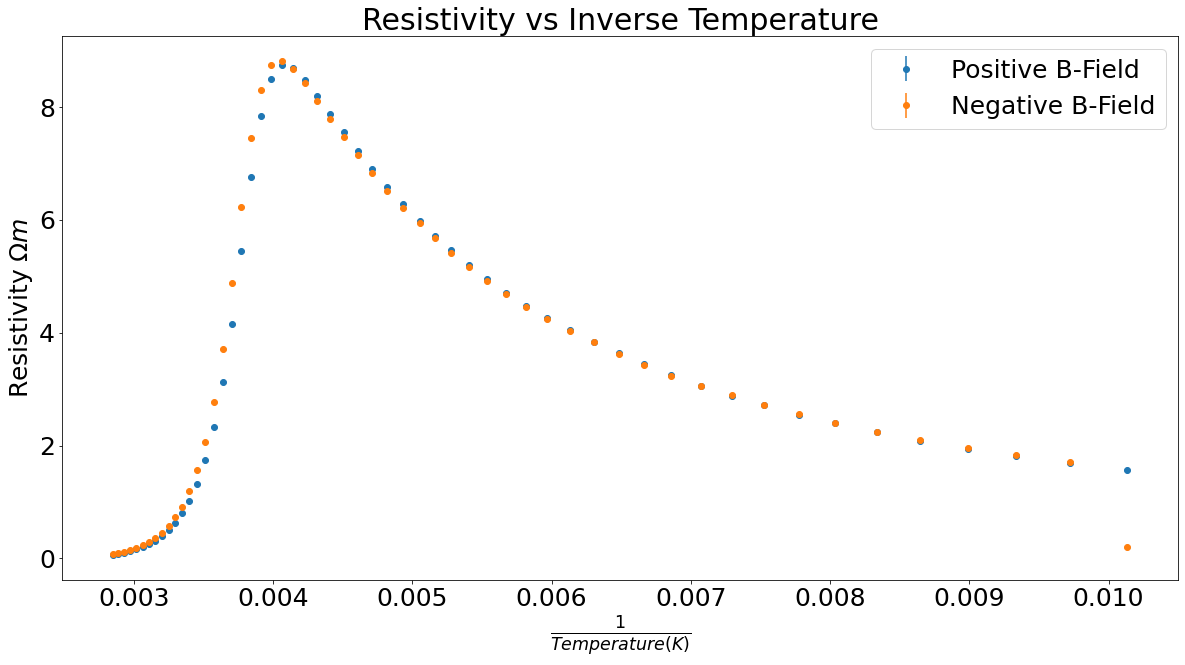

In [68]:
plt.figure(figsize=(20,10))
plt.errorbar(inverse_temperature, resistivity_pos, yerr =resistivity_error_pos, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(inverse_temperature, resistivity_neg, yerr =resistivity_error_neg, marker='o', linestyle = 'none', label = 'Negative B-Field')
#plt.errorbar(inverse_temperature, resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'Resistivity $\Omega m$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Resistivity vs Inverse Temperature')

# Conductivity vs Temperature

Text(0.5, 1.0, 'Conductivity vs Inverse Temperature')

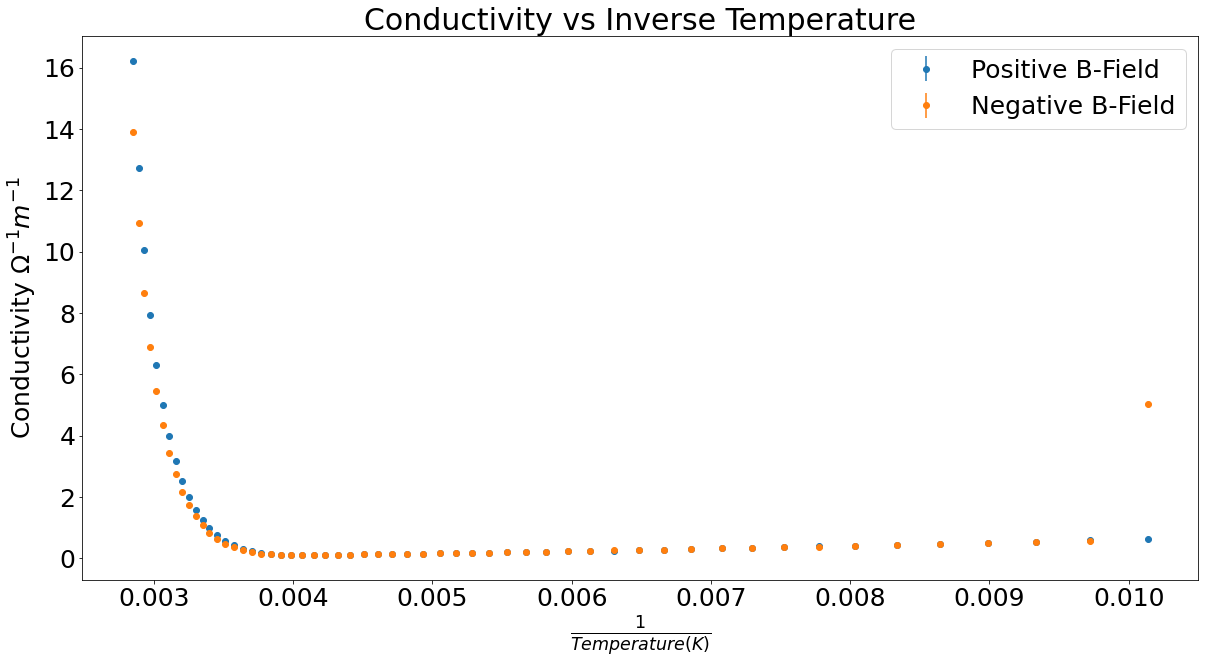

In [69]:
plt.figure(figsize=(20,10))
plt.errorbar(inverse_temperature, 1/resistivity_pos, yerr =resistivity_error_pos, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(inverse_temperature, 1/resistivity_neg, yerr =resistivity_error_neg, marker='o', linestyle = 'none', label = 'Negative B-Field')
#plt.errorbar(inverse_temperature, 1/resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'Conductivity $\Omega^{-1} m^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Conductivity vs Inverse Temperature')

# Hall Coefficienct vs Inverse Temperature

In [70]:
dataframe_pos = dataframe[dataframe['B-Field (Gauss)']>40]
dataframe_neg = dataframe[dataframe['B-Field (Gauss)']<-40]
dataframe_zero = dataframe[dataframe['B-Field (Gauss)']>-40]
dataframe_zero = dataframe_zero[dataframe_zero['B-Field (Gauss)']<40]

In [71]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i.value)/2.403))
        else: 
            series.append(1/np.cosh(np.log(np.abs(i.value))/2.403))

    return series

index = dataframe_pos
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = np.array(index['Voltage BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm


rabdc = np.array(index['Voltage DC']/index['sample I AB']) * u.Ohm
rabdc_error = np.array(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) * u.Ohm

radbc = np.array(index['Voltage BC']/index['sample I AD']) * u.Ohm
radbc_error = np.array(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) )* u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.array(np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value)) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh_pos = -(trans_resistance/magnetic_field * d).to('m^3/C')
rh_error_pos = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')

In [72]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i.value)/2.403))
        else: 
            series.append(1/np.cosh(np.log(np.abs(i.value))/2.403))

    return series

index = dataframe_neg
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = np.array(index['Voltage BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm


rabdc = np.array(index['Voltage DC']/index['sample I AB']) * u.Ohm
rabdc_error = np.array(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) * u.Ohm

radbc = np.array(index['Voltage BC']/index['sample I AD']) * u.Ohm
radbc_error = np.array(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) )* u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.array(np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value)) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh_neg = -(trans_resistance/magnetic_field * d).to('m^3/C')
rh_error_neg = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')

Text(0.5, 1.0, 'Hall Coefficient vs Inverse Temperature')

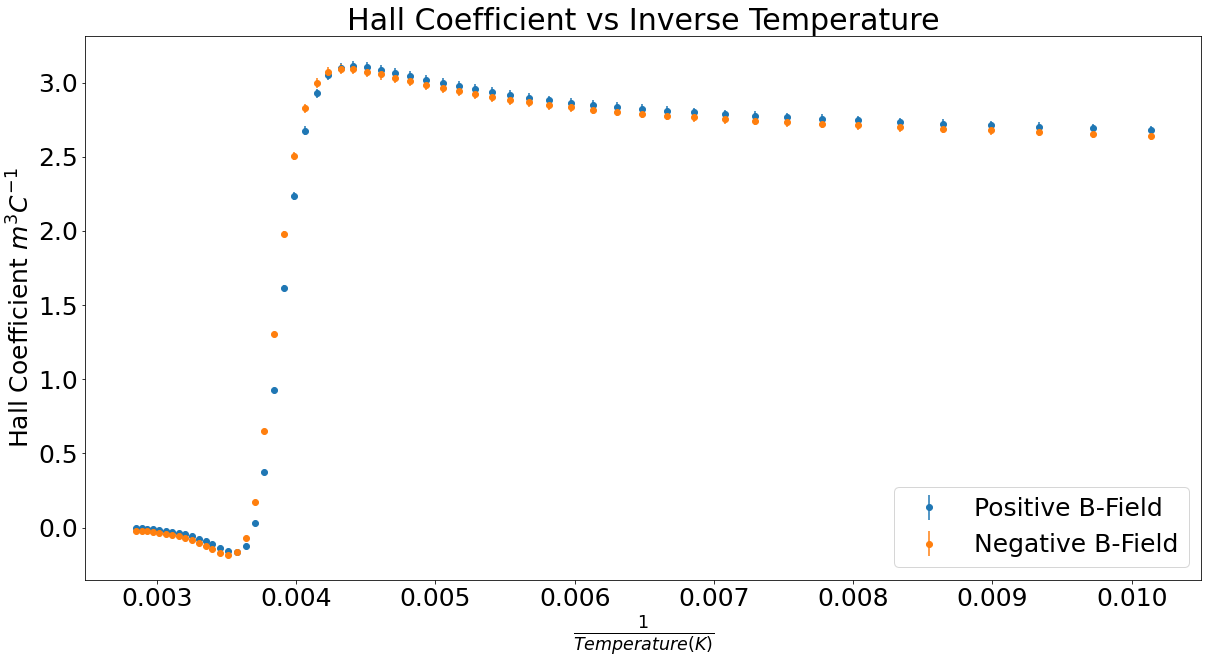

In [73]:
plt.figure(figsize=(20,10))
plt.errorbar(inverse_temperature, rh_pos, yerr =rh_error_pos, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(inverse_temperature, rh_neg, yerr =rh_error_neg, marker='o', linestyle = 'none', label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Hall Coefficient vs Inverse Temperature')

# Plot (Hall coefficient X conductivity) versus T. Where does Hall coefficient becomes zero

In [74]:
pos_conductivity = np.array(1/resistivity_pos) * u.Ohm**-1 * u.m**-1
neg_conductivity = np.array(1/resistivity_neg) * u.Ohm**-1 * u.m**-1

temp = resistivity_error_pos * u.Ohm * u.m
conductivity_pos_error = np.sqrt((-pos_conductivity**2*temp)**2)

temp = resistivity_error_neg * u.Ohm * u.m
conductivity_neg_error = np.sqrt((-neg_conductivity**2*temp)**2)

In [75]:
rhconpos = rh_pos * pos_conductivity
rhconpos_error = np.sqrt((rh_error_pos*pos_conductivity)**2 + (conductivity_pos_error*rh)**2)
max_index = np.where(rhconpos_error==np.max(rhconpos_error))
rhconpos_error = np.delete(rhconpos_error, max_index)
rhconpos = np.delete(rhconpos, max_index)
correct_temp_pos = np.delete(np.array(inverse_temperature), max_index)


rhconneg = rh_neg * neg_conductivity
rhconneg_error = np.sqrt((rh_error_neg*neg_conductivity)**2 + (conductivity_neg_error*rh)**2)
max_index = np.where(rhconneg_error==np.max(rhconneg_error))
rhconneg_error = np.delete(rhconneg_error, max_index)
rhconneg = np.delete(rhconneg, max_index)
correct_temp_neg = np.delete(np.array(inverse_temperature), max_index)
#np.delete(inverse_temperature, max_index)

#rhconneg_error[max_index] = np.max(rhconpos_error)

Text(0.5, 1.0, 'Hall Mobility vs Inverse Temperature')

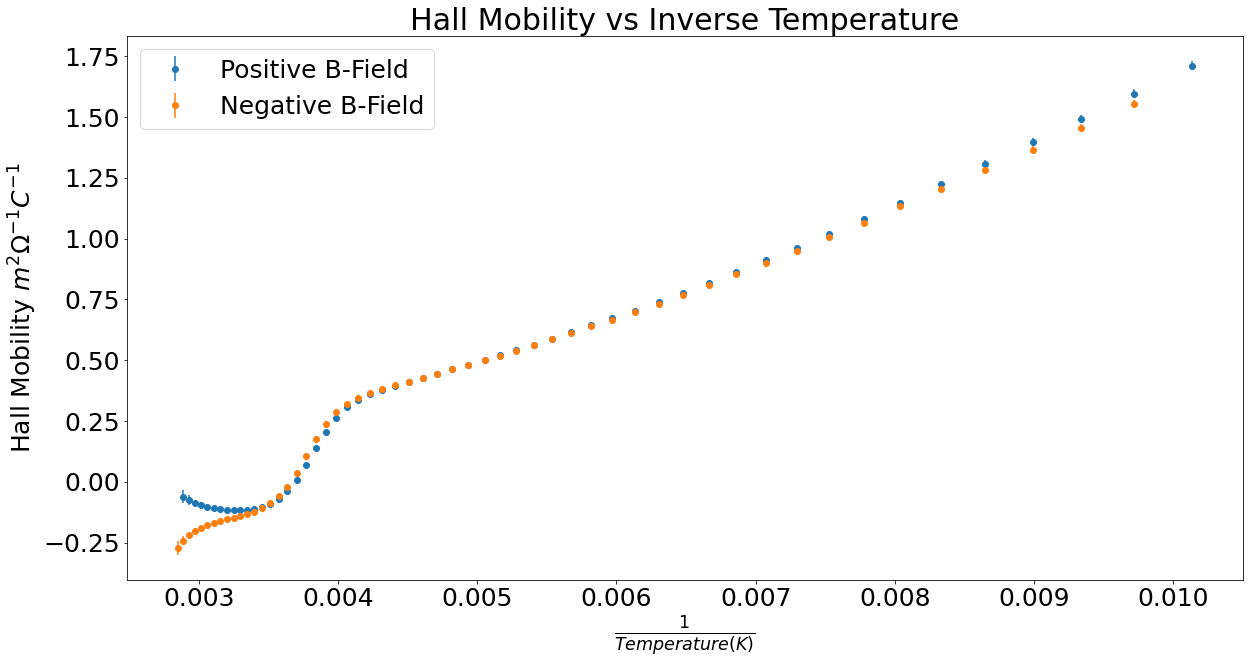

In [76]:
plt.figure(figsize=(20,10))
plt.errorbar(correct_temp_pos, rhconpos, yerr = rhconpos_error, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(correct_temp_neg, rhconneg, yerr = rhconneg_error, marker='o', linestyle = 'none', label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Hall Mobility vs Inverse Temperature')

# Explain what type of material we have: p-type or n-type. (Why don’t you need to know the direction of the magnetic field after all?)

# Find electron or hole concentrations for the sample versus temperature.

Text(0, 0.5, 'Concentration')

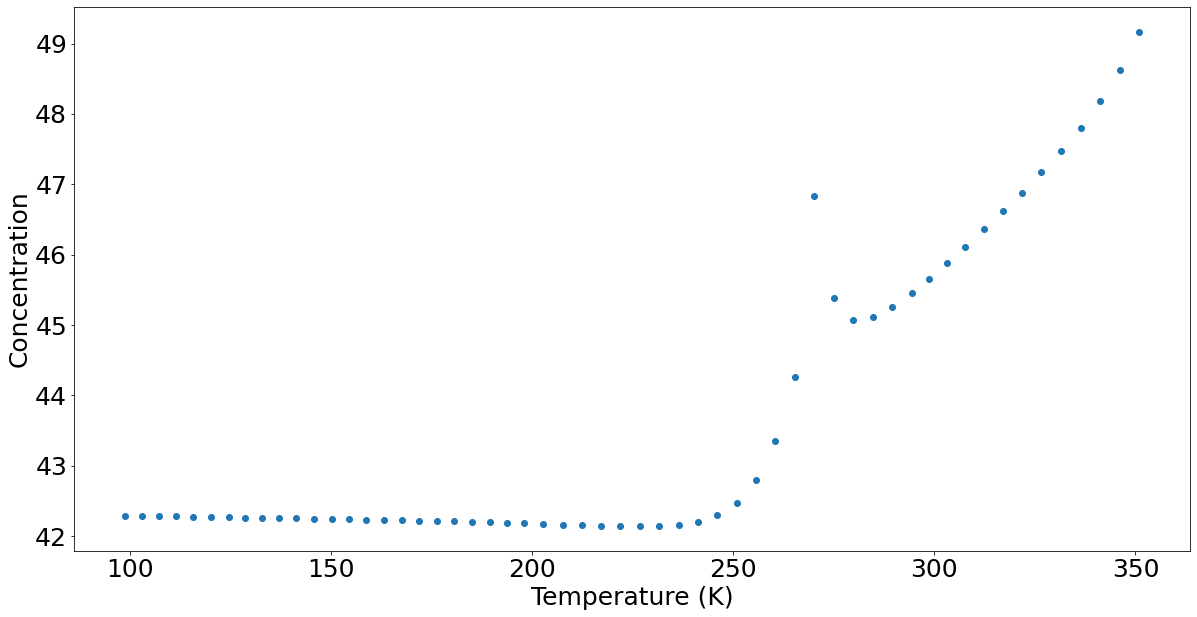

In [77]:

plt.figure(figsize=(20,10))
concentration = 1/(rh_pos*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.scatter(1/inverse_temperature, np.log(np.abs(concentration.value)))
plt.xlabel('Temperature (K)')
plt.ylabel('Concentration')

# Find the Hall Coefficient RH and Hall mobility

Text(0.5, 1.0, 'Hall Coefficient vs Temperature')

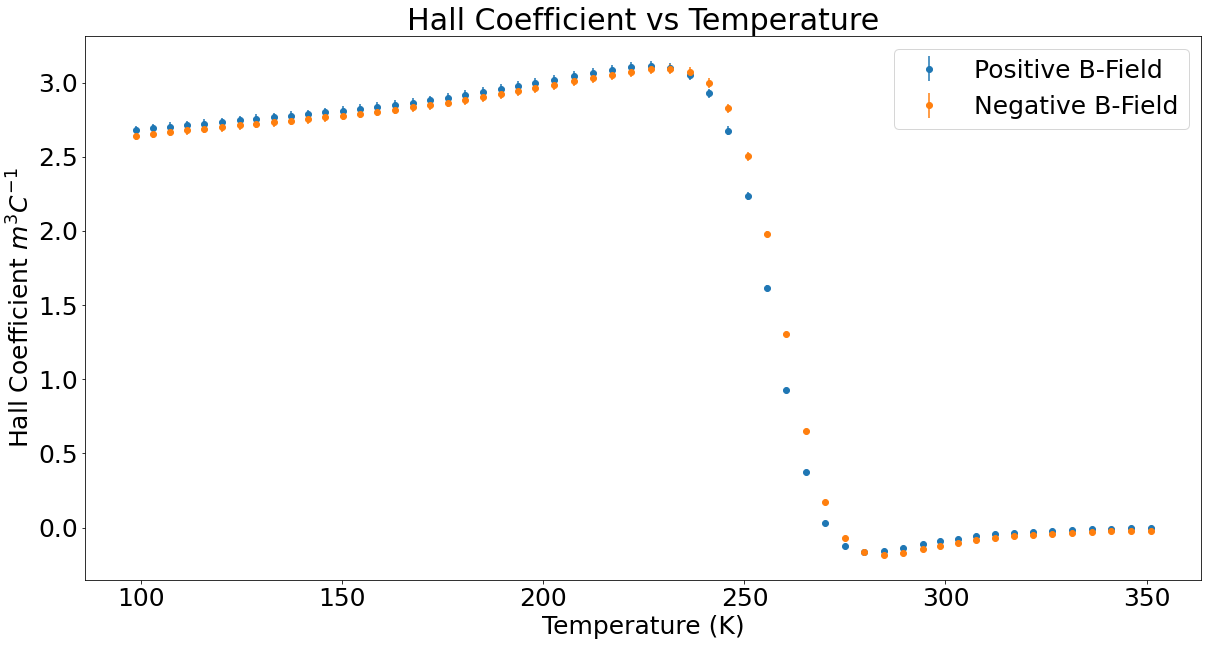

In [78]:
plt.figure(figsize=(20,10))
plt.errorbar(1/inverse_temperature, rh_pos, yerr =rh_error_pos, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(1/inverse_temperature, rh_neg, yerr =rh_error_neg, marker='o', linestyle = 'none', label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Coefficient vs Temperature')

In [79]:
np.shape(rhconpos)

(55,)

Text(0.5, 1.0, 'Hall Mobility vs Temperature')

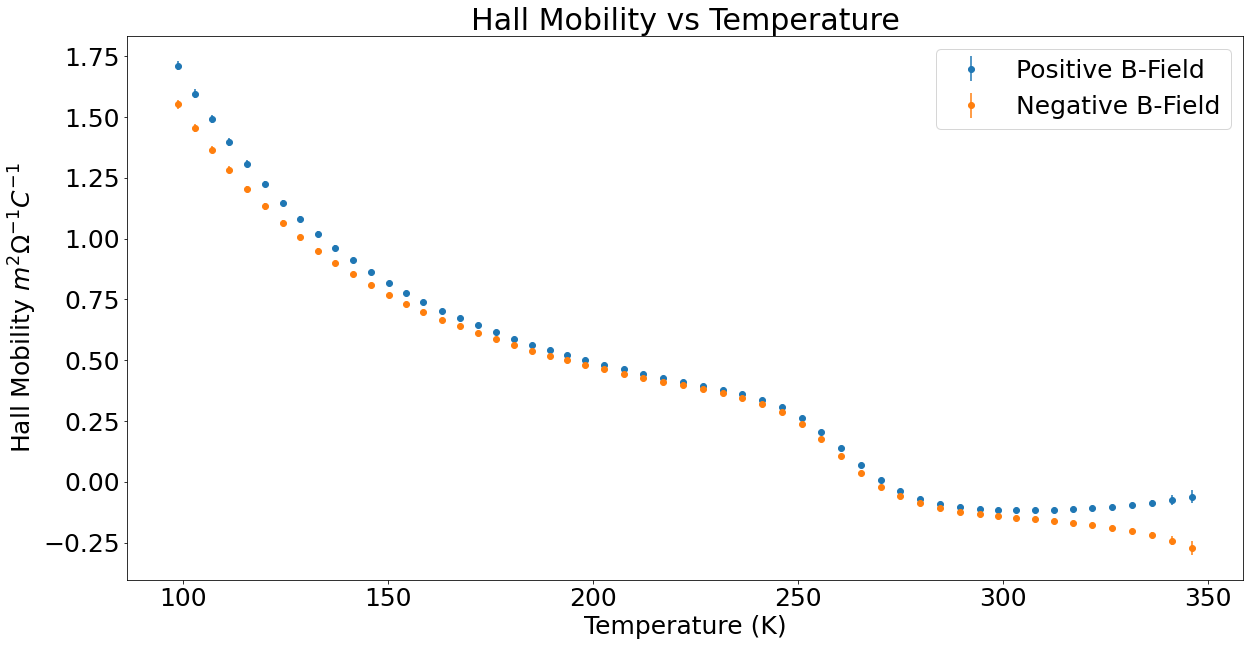

In [80]:
plt.figure(figsize=(20,10))
plt.errorbar(1/correct_temp_pos, rhconpos, yerr = rhconpos_error, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(1/correct_temp_pos, rhconneg, yerr = rhconneg_error, marker='o', linestyle = 'none', label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Mobility vs Temperature')

# Find electron or hole concentration in the extrinsic region see E. Haller Article.


(42.1, 42.25)

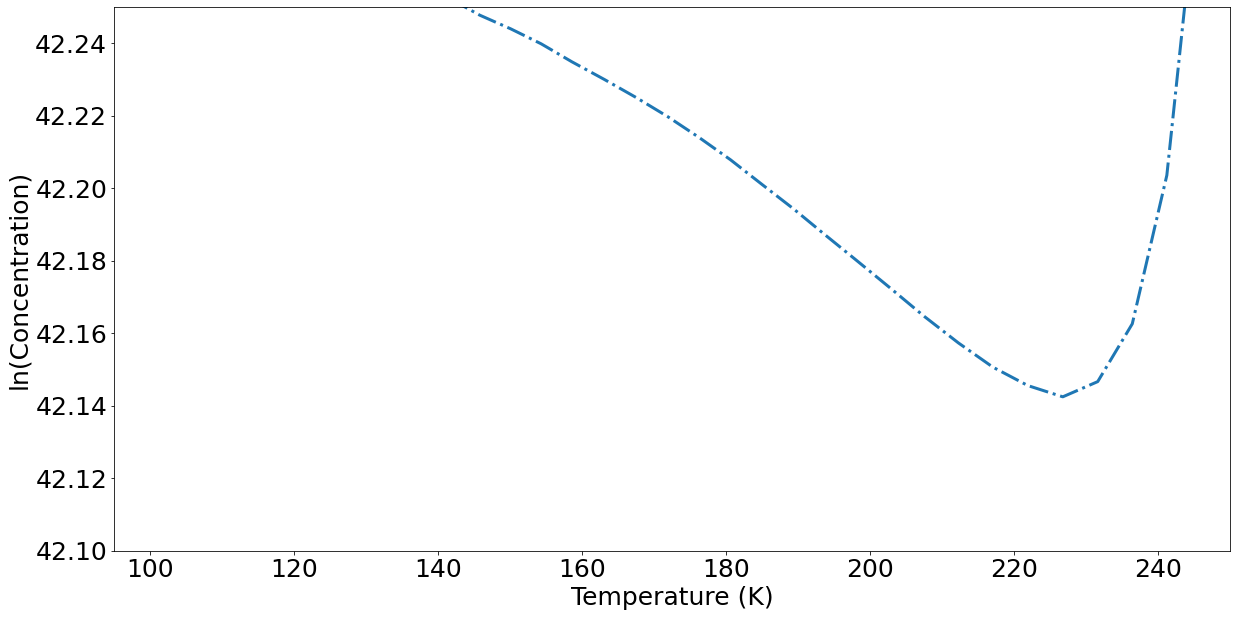

In [81]:

plt.figure(figsize=(20,10))
concentration = 1/(rh_pos*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(1/inverse_temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
plt.xlim(95, 250)
plt.ylim(42.1, 42.250)


(42.14, 42.15)

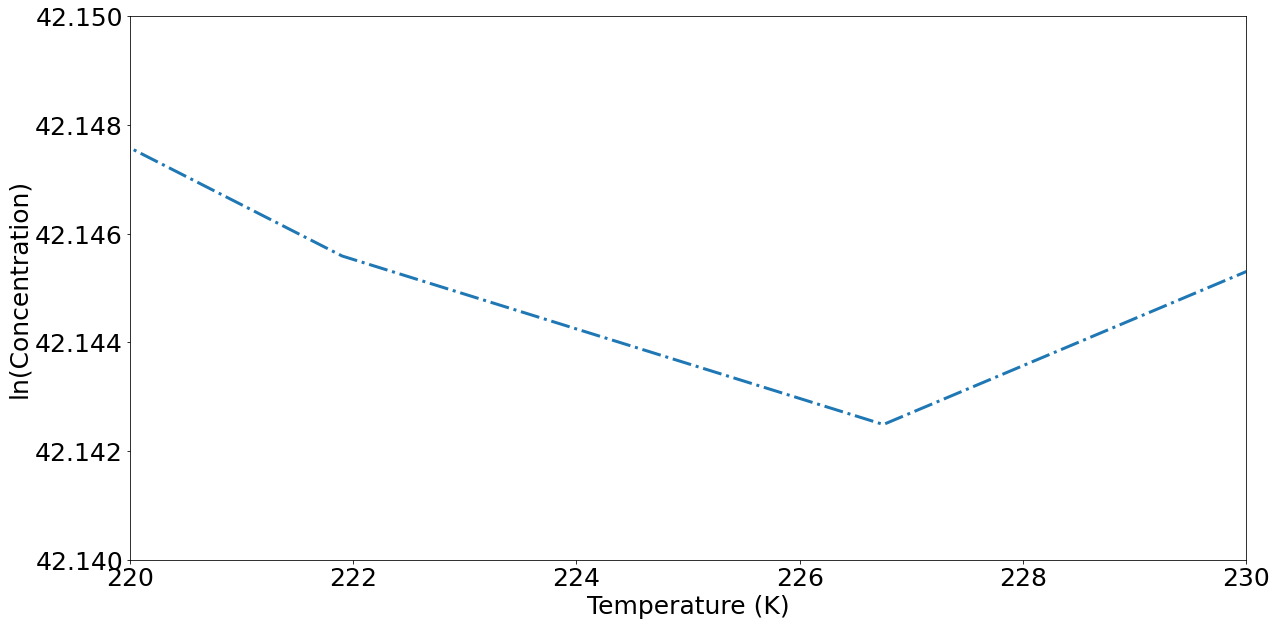

In [82]:

plt.figure(figsize=(20,10))
concentration = 1/(rh_pos*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(1/inverse_temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
plt.xlim(220, 230)
plt.ylim(42.14, 42.15)


# Find electron and hole mobilities in the extrinsic region.


(0.3, 0.5)

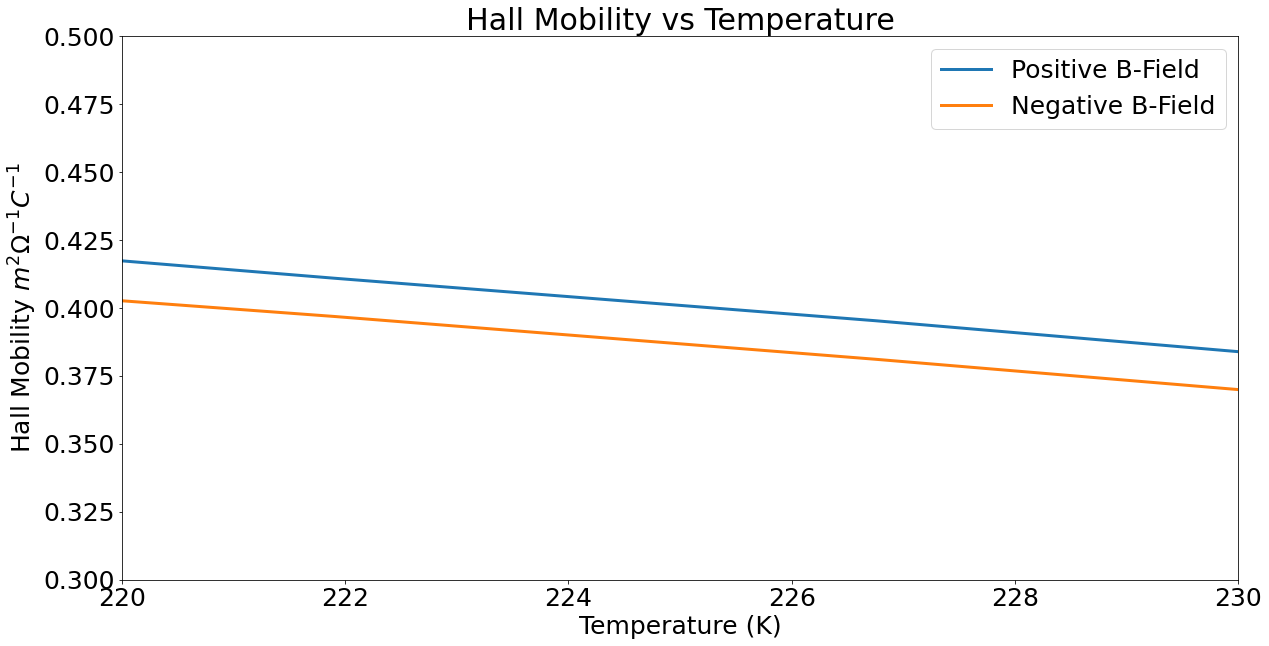

In [83]:
plt.figure(figsize=(20,10))
plt.plot(1/correct_temp_pos, rhconpos, linewidth = 3, label = 'Positive B-Field')
plt.plot(1/correct_temp_pos, rhconneg, linewidth = 3, label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Mobility vs Temperature')
plt.xlim(220, 230)
plt.ylim(0.3,.5)

# Compare the resistance measured for the sample (at zero field) with the magnetoresistance (the resistance measured while the magnetic field is on).


Text(0.5, 0, 'Temperature (K)')

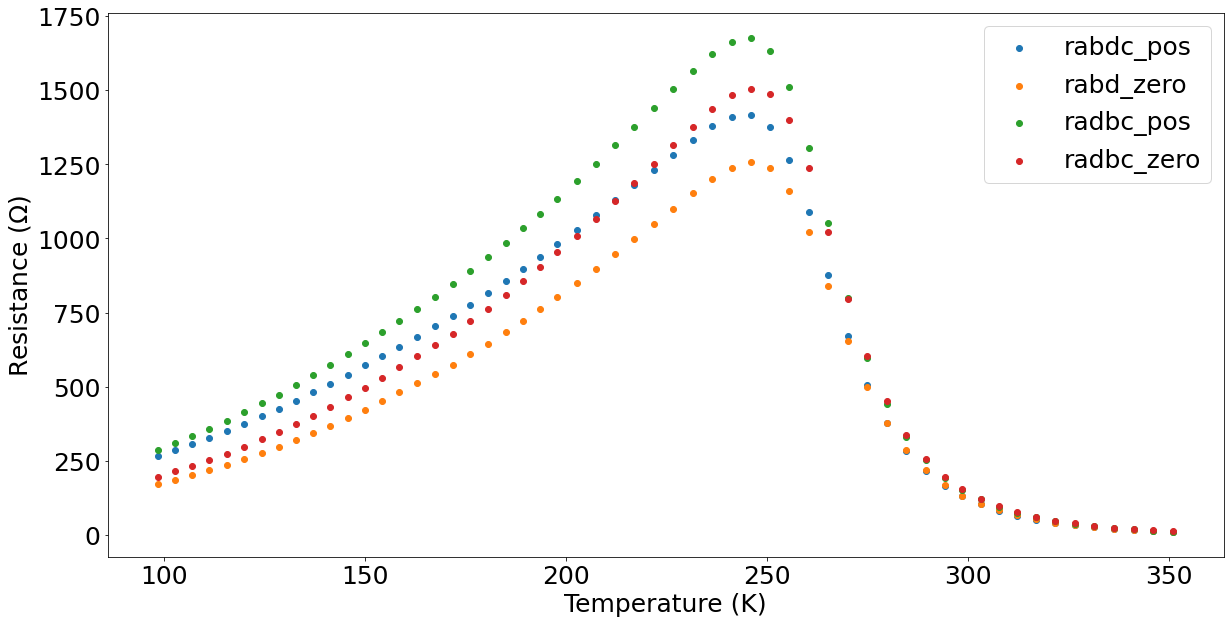

In [84]:
plt.figure(figsize=(20,10))
plt.scatter(temperature, rabdc_pos, label = 'rabdc_pos')
plt.scatter(temperature, rabdc_zero, label = 'rabd_zero')

plt.scatter(temperature, radbc_pos, label = 'radbc_pos')
plt.scatter(temperature, radbc_zero, label = 'radbc_zero')
plt.legend(loc='best')
plt.ylabel(r'Resistance ($\Omega$)')
plt.xlabel(r'Temperature (K)')

# Find electron or hole concentration in the extrinsic region see E. Haller Article.
# Find electron and hole mobilities in the extrinsic region.
# Last day of the experiment please fill out the Experiment Evaluation